In [1]:
%matplotlib inline
from IPython.display import Image
%config InlineBackend.figure_format = 'svg'
# export slides with terminal command: 
# jupyter nbconvert run_haats.ipynb --to slides --post serve --reveal-prefix http://cdn.bootcss.com/reveal.js/3.1.0
#http://127.0.0.1:8000/run_haats.slides.html#/2/1
#jupyter nbconvert run_haats.ipynb --to markdown

from import_data import *
from estimation import*
np.random.seed(222)
plt.close("all")
from matplotlib import rc
# import ipdb

['/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/serginio/Library/Jupyter/runtime/kernel-175bd86f-f9bb-4a8b-a3ba-4328bb18f7b0.json']
['/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/serginio/Library/Jupyter/runtime/kernel-175bd86f-f9bb-4a8b-a3ba-4328bb18f7b0.json']
['/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/serginio/Library/Jupyter/runtime/kernel-175bd86f-f9bb-4a8b-a3ba-4328bb18f7b0.json']


# On fancy  <font color='grey'>H</font><font color='blue'>A</font><font color='green'>²</font><font color='red'>T</font><font color='purple'>S</font>
![title](/Users/serginio/GitHub/ssylvain/research/haats/output/figures/queen_hat.jpg) 


### An introduction to <font color='grey'>H</font>idden-state <font color='blue'>A</font>rbitrage-free <font color='green'>A</font>ffine  <font color='red'>T</font>erm <font color='purple'>S</font>tructure (<font color='grey'>H</font><font color='blue'>A</font><font color='green'>A</font><font color='red'>T</font><font color='purple'>S</font>) models




#### Author: Serginio &#8220;Gino&#8221; Sylvain 
##### code: https://github.com/GinoAndTonic/ssylvain_public/blob/master/research/haats

#### The US government issues both nominal bonds and inflation-linked bonds (Treasury Inflation Protected Securities; TIPS). 
#### Hence, or a given maturity, the latter tends to be more expensive $\Rightarrow$ lower yields


How do we know when to go long/short Break-Even’s (Nominal Bonds vs ILBs) ?



What is the market-implied inflation rate?



How can we extract the term premium from using a theoretical/structural model?



How can we forecast both nominal and ilb yields in consistent/theoretically robust manner?



How can we extract and forecast market implied discount rates which price these securities?




### We often use the Break-Even rate (BE = Nominal Yield - TIPS Yield) as an estimate of expected inflation

![title](/Users/serginio/GitHub/ssylvain/research/haats/output/figures/fred_bkeven.jpg) 

For example: if Break-Evens (BE) come down quite a bit, what is that? Should we go long or short Break-evens (by trading ILB’s and short Nominal Bonds or using derivatives)?



But  wait…. BE = Exp. Inf. + IRP

* Perhaps shorting BE’s is more attractive if Exp. Inf. implied by BE’s is “too low”


* If instead, it is the IRP that is low (or negative) and dragging BE’s down, then it may be reflecting that investors  expect  future inflation to coincide with a period of higher income growth and/or that nominal yields are coming down sharply due to safe haven flows 


* In general, Exp. Inf. and IRP implied by BE  can help inform our investment decisions


## Theory




### <font color='grey'>H</font><font color='blue'>A</font><font color='green'>²</font><font color='red'>T</font><font color='purple'>S</font> ingredients 


#### The model replicates / is heavily inspired by the  series of papers by Christensen – Diebold – Lopez – Rudebusch (2007, 2010, 2013)

Suppose there several nominal bonds (*N*) and several inflation-linked ("real") bonds (*R*)


The no-arbitrage price of a zero-coupon bond with maturity $\tau$ is: 

\begin{eqnarray*}
P_{t}^{N}\{\tau\}&=&E_{t}\left[\frac{M_{t+\tau}^{N}}{M_{t}^{N}}\times1\right]=exp\left(-y_{t}^{N}\left\{ \tau\right\} \cdot\tau\right)\\&&\\P_{t}^{R}\{\tau\}&=&E_{t}\left[\frac{M_{t+\tau}^{R}}{M_{t}^{R}}\times1\right]=exp\left(-y_{t}^{R}\left\{ \tau\right\} \cdot\tau\right)
\end{eqnarray*} 

Here, $y_{t}^{N}$ and $y_{t}^{R}$ are the nominal and real yields respectively. 
$M_{t}^{N}$  and $M_{t}^{N}$ are the nominal and real state price densities.


The SPDs follow 

\begin{eqnarray*}
\frac{dM_{t}^{R}}{M_{t}^{R}}&=&-r_{t}^{R}dt-\Gamma_{t}\cdot dW_{t}\\&&\\\frac{dM_{t}^{N}}{M_{t}^{N}}&=&-r_{t}^{N}dt-\Gamma_{t}\cdot dW_{t}
\end{eqnarray*}

For what follows, to simplify the notation, let us suppress the *N*  and *R*  superscripts. 

The short rates and risk prices are assumed to be affined in the state variables. This is where we put the rabbit inside the hat...

\begin{eqnarray*}
r_{t}&=&\rho_{0}+\rho_{1}\cdot X_{t}
\\
\Gamma_{t}&=&\gamma_{0}+\gamma_{1}\cdot X_{t}
\end{eqnarray*}



\begin{eqnarray*}
P_{t}\{\tau\}&=&E_{t}^{Q}\left[exp\left(-\int_{t}^{t+\tau}r_{s}ds\right)\right]\\&&\\r_{t}&=&\rho_{0}+\rho_{1}\cdot X_{t} \\&&\\\Rightarrow P_{t}\{\tau\}&=&exp\left(B_{t}\left\{ \tau\right\} \cdot X_{t}+G_{t}\left\{ \tau\right\} \right)\\&&\text{Since }exp\left(-\int_{0}^{t}r_{s}ds\right)P_{t}\left\{ \tau\right\} \text{ is Martingale under }Q\text{, it's drift is zero.}\\&&\text{Thus, we allow for no arbitrage and }\\&&\text{ by using Ito's Lemman and setting }E_{t}^{Q}\left[\frac{dP_{t}\{\tau\}}{P_{t}\{\tau\}}\right]-r_{t}=0\\&&B_{t}\left\{ \tau\right\} \text{ and }G_{t}\left\{ \tau\right\} \text{ solve some ODEs.}\\&&\\y_{t}\{\tau\}&=&-\frac{1}{\tau}ln\left(P_{t}\{\tau\}\right)=-\frac{1}{\tau}B_{t}\left\{ \tau\right\} \cdot X_{t}-\frac{1}{\tau}G_{t}\left\{ \tau\right\} 
\end{eqnarray*}

Solving for B_{t} and G_{t} uniquely typically requires imposing some ad-hoc parameter values and other restrictions with little motivation.

Instead, following Christensen, Lopez, Rudebusch (2010) we assume a dynamic Nelson-Seigel (1987) model and impose level, slope and curvature restrictions by replacing the Nelson-Seigel (1987) parameters with the level, slope and curvature state variables. 


This is sensible since there is a lot of evidence that Level, Slope, and Curvature (e.g. from PCA) explain the cross-section of government bonds. Furthermore, the data we will use to fit the model will itself be smoothe yields data from Nelson-Seigel-Svennson-type models.

Hence, the second key assumption concerns the state variables:

\begin{eqnarray*}
X_{t}&=&\left(\begin{array}{c}
L_{t}^{N}\\
S_{t}\\
C_{t}\\
L_{t}^{R}
\end{array}\right)
\\
dX_{t}&=&K^{P}\left(\theta^{P}-X_{t}\right)dt+\Sigma dW_{t}
\end{eqnarray*}

This implies

\begin{eqnarray*}
y_{t}^{N}\{\tau\}	&=&	L_{t}^{N}+S_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}\right)+C_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}-e^{-\lambda\tau}\right)-\frac{G_{t}^{N}\left\{ \tau\right\} }{\tau}
\\
y_{t}^{R}\{\tau\}	&=&	L_{t}^{R}+\alpha^{R}S_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}\right)+\alpha^{R}C_{t}\left(\frac{1-e^{-\lambda\tau}}{\lambda\tau}-e^{-\lambda\tau}\right)-\frac{G_{t}^{R}\left\{ \tau\right\} }{\tau}
 \end{eqnarray*}

## Empirical approach

We observe the Nominal bond and ILB yields but the state variables (*X*) are hidden. We also need to estimate the model parameters.


First, we can re-write the key equations of the model...


Measurements: $$y_{t}=A_{0}+A_{1}X_{t}+\epsilon_{t} \qquad \text{with }\epsilon_{t}\sim N(0,\Phi)$$


States: $$X_{t}=U_0+U_1 X_{t_-1}+\eta_{t} \qquad \text{with } \eta_{t}\sim N(0,Q)$$

Since the Brownian Motion increments are Gaussian, Kalman-filtering is an efficient and consistent estimator.
It also allows for asynchronous variables (crucial: if we later include observed Macro variables as state variables).


We use the Kalman filter along with MLE to jointly extract the hidden states and estimate the model parameters.



#### Data


Importing (Nelson Siegel smoothed/fitted) yield data for TIPS and Nominal bonds...

Data source:

http://www.federalreserve.gov/econresdata/researchdata/feds200628.xls

https://www.federalreserve.gov/econresdata/researchdata/feds200805.xls

In [4]:
# Import data from FED
tips_data, nominal_data = ImportData.importUS_Data(plots=1,save=1)

In [5]:
fig, ax = plt.subplots(1)
figures = {'fig1': fig, 'ax_fig1': ax}
nominal_data.plot(ax=figures['ax_fig1'],figsize=(8,8))
plt.legend(loc='center left',fontsize=9,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig1'].set_title('US Nominal Bonds')
plt.show()

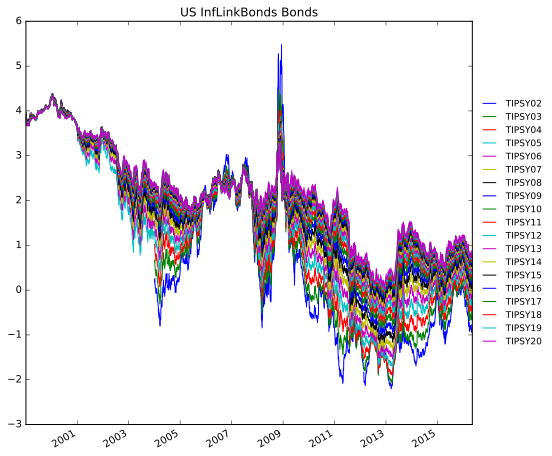

In [6]:
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
tips_data.plot(ax=figures['ax_fig2'],figsize=(8,8))
plt.legend(loc='center left',fontsize=9,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('US InfLinkBonds Bonds')
plt.axes.labelcolor='black'
plt.show()

## Kalman filter example

Measurements: $$y_{t}=A_{0}+A_{1}X_{t}+\epsilon_{t} \qquad \text{with }\epsilon_{t}\sim N(0,\Phi)$$


States: $$X_{t}=U_0+U_1 X_{t_-1}+\eta_{t} \qquad \text{with } \eta_{t}\sim N(0,Q)$$


Assign model parameters

In [7]:
T_=100 #number of dates
m=14 #number of bonds
s = 4 #number of states
A0, A1, U0, U1, Q, Phi = np.mat(np.random.randn(m, 1)), np.mat(np.random.randn(m, s)), \
                            np.mat(np.random.randn(s, 1)), np.mat(np.diag(np.diag(np.random.rand(s, s)))), \
                            np.mat(np.diag(np.diag(np.random.rand(s, s)))), np.mat(np.diag(np.diag(np.random.rand(m, m))))

Simulate state variables (X) and the measurement (Y)

In [8]:
X0 = np.mat(np.random.randn(s,1))
X = np.mat(np.empty((T_,s))*np.nan)
Y = np.mat(np.empty((T_,m))*np.nan)
for t in range(T_):
    if t==0:
        X[t,:] = (U0+U1*X0+Q*np.mat(np.random.randn(s,1))).T
    else:   
        X[t,:] = (U0+U1*X[t-1,:].T +Q*np.mat(np.random.randn(4,1))).T
    Y[t,:] = (A0+A1*X[t,:].T+Phi*np.mat(np.random.randn(m,1))).T

X_df= pd.DataFrame(np.array(X),
                columns=['LN', 'S', 'C', 'LR'], index=pd.date_range('2000-01-01', periods=X.shape[0]))
Y_df= pd.DataFrame(np.array(Y),
                columns=['yield_'+str(i) for i in range(m)], index=pd.date_range('2000-01-01', periods=X.shape[0]))

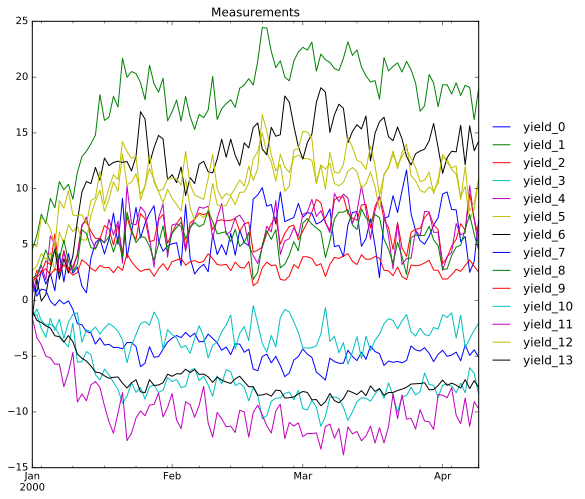

In [9]:
plt.rc('text', usetex=False)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
Y_df.plot(ax=figures['ax_fig2'],figsize=(8,8),linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Measurements')
plt.show()

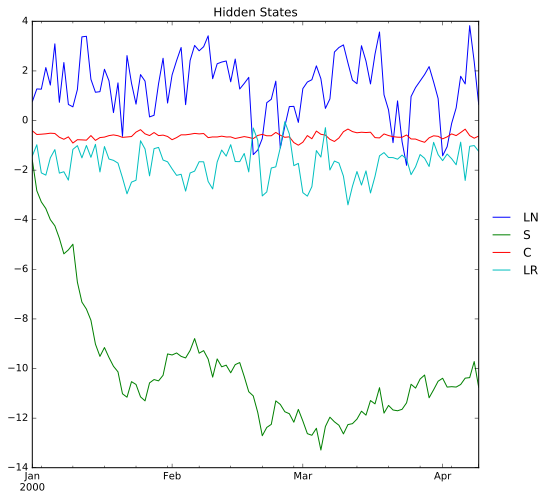

In [10]:
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
X_df.plot(ax=figures['ax_fig2'],figsize=(8,8),linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Hidden States')
plt.axes.labelcolor='black'
plt.show()

### Runing filter

In [11]:
kalman1 = Kalman(Y_df, A0, A1, U0, U1, Q, Phi,statevar_names = X_df.columns.values)
Ytt_filtered, Yttl_filtered, Xtt_filtered, Xttl_filtered, Vtt_filtered, Vttl_filtered, Gain_t_filtered, eta_t_filtered, \
    cum_log_likelihood = kalman1.filter()

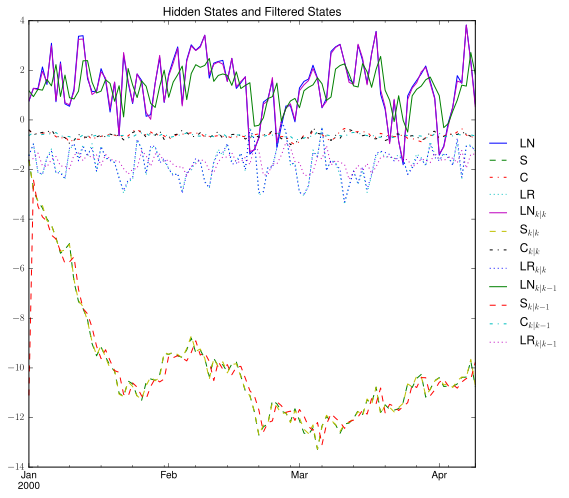

In [13]:
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']

plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [X_df,
    Xtt_filtered.rename(columns={i:i+'$_{k|k}$' for i in Xtt_filtered.columns.values},inplace=False),
    Xttl_filtered.rename(columns={i:i+'$_{k|k-1}$' for i in Xtt_filtered.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Hidden States and Filtered States')
plt.axes.labelcolor='black'
plt.show()

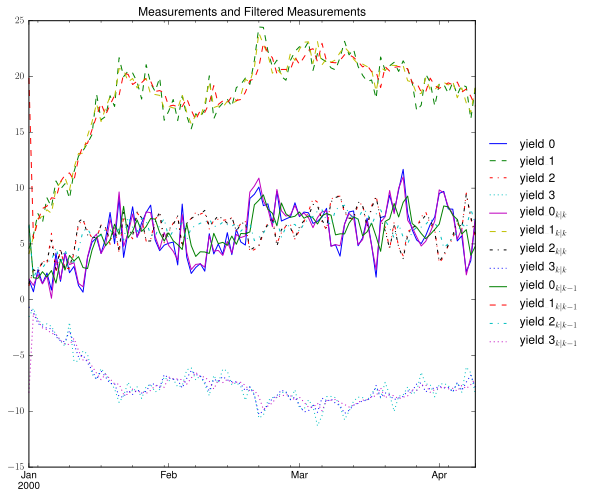

In [14]:
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']
plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [Y_df.iloc[:,0:4].rename(columns={i:str.replace(i,'_','\_') for i in Y_df.columns.values},inplace=False),
    Ytt_filtered.iloc[:,0:4].rename(columns={i:str.replace(i,'_','\_')+'$_{k|k}$' for i in Ytt_filtered.columns.values},inplace=False),
    Yttl_filtered.iloc[:,0:4].rename(columns={i:str.replace(i,'_','\_')+'$_{k|k-1}$' for i in Yttl_filtered.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Measurements and Filtered Measurements')
plt.axes.labelcolor='black'
plt.show()

#### Runing smoother

In [ ]:
XtT, VtT, Jt = kalman1.smoother(Xtt_filtered, Xttl_filtered, Vtt_filtered, Vttl_filtered, Gain_t_filtered, eta_t_filtered)

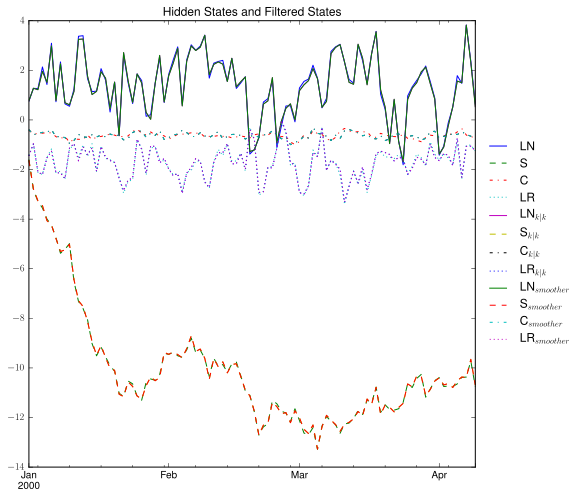

In [17]:
linestyles = ['-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':']

plt.rc('text', usetex=True)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
pd.concat(
    [X_df,
    Xtt_filtered.rename(columns={i:i+'$_{k|k}$' for i in Xtt_filtered.columns.values},inplace=False),
    XtT.rename(columns={i:i+'$_{smoother}$' for i in Xtt_filtered.columns.values},inplace=False)]
, axis=1).plot(ax=figures['ax_fig2'],figsize=(8,8),style=linestyles,linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('Hidden States and Filtered States')
plt.axes.labelcolor='black'
plt.show()

### Forecasts

In [18]:
forecast, forecast_std, forecast_cov = kalman1.forecast(Xtt_filtered, horizon=10)

processing time for forecast: 2.210237


In [19]:
#import seaborn as sns
import seaborn.apionly as sns #use sns.distplot but maintain the default matplotlib styling
sns.set("talk", font_scale=1, rc={"lines.linewidth": 1,"axes.labelcolor":'black',"text.color":'black'})

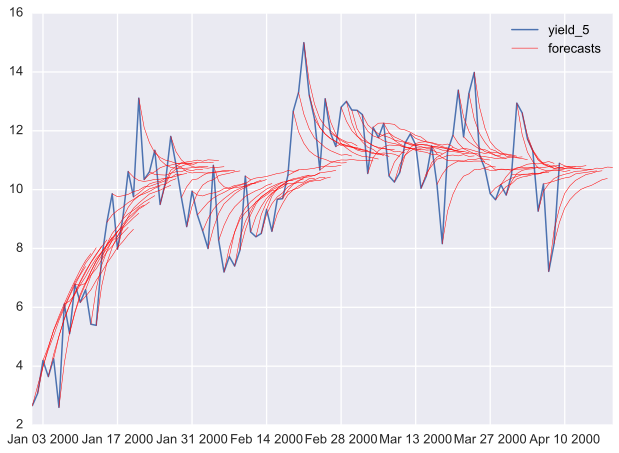

In [20]:
fig, ax = sns.plt.subplots(1)
line,=sns.plt.plot(forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].set_index(\
    forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].index.get_level_values('date')),linewidth=1.5\
    #,linestyle='solid', marker='o', markerfacecolor='blue', markersize=3.5
                  )
line.set_label('yield_5')
for t in forecast.index.get_level_values('date').unique():
    line,=sns.plt.plot(
        forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].set_index(
        forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].index.get_level_values('horizon'))
        ,color='red',linewidth=0.5)
line.set_label('forecasts')
sns.plt.legend()    
sns.plt.axes.labelcolor='black'
sns.plt.show()

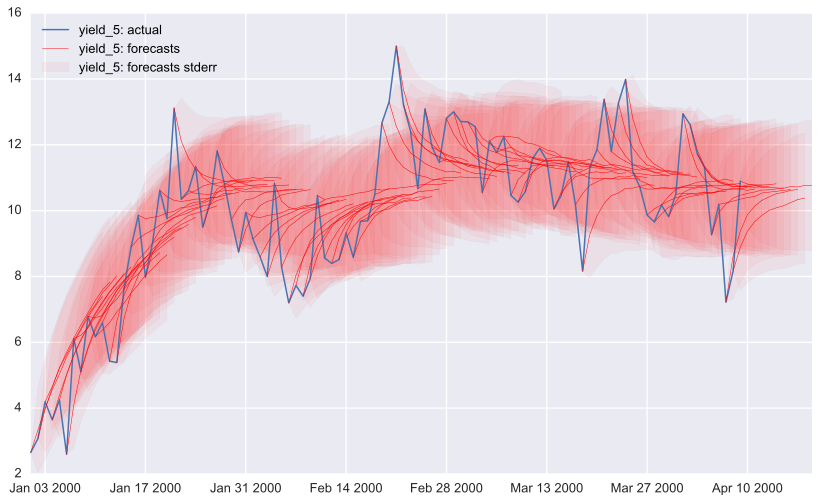

In [21]:
fig, ax = sns.plt.subplots(1,figsize=(14,8))
line,=sns.plt.plot(forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].set_index(\
    forecast[['yield_5']].iloc[np.arange(0, forecast.shape[0], 10+1)].index.get_level_values('date')),linewidth=1.5\
    #,linestyle='solid', marker='o', markerfacecolor='blue', markersize=3.5
                  )
line.set_label('yield_5: actual')
for t in forecast.index.get_level_values('date').unique():
    line,=sns.plt.plot(
        forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].set_index(
        forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].index.get_level_values('horizon'))
        ,color='red',linewidth=0.5)
    fill=plt.fill_between(forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].index.get_level_values('horizon').values
                     , 
                     forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].values[:,0]-
                     forecast_std[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].values[:,0],
                     forecast[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].values[:,0]+
                     forecast_std[['yield_5']].iloc[forecast.index.get_level_values('date')==t,:].values[:,0]
                    , facecolor='red', interpolate=True, alpha=.05
                    )
line.set_label('yield_5: forecasts')
fill.set_label('yield_5: forecasts stderr')
sns.plt.legend(loc='best')    
sns.plt.axes.labelcolor='black'
sns.plt.show()

In [24]:
forecast_e, forecast_se, forecast_mse, forecast_rmse, forecast_mse_all, forecast_rmse_all = \
        kalman1.rmse(forecast)

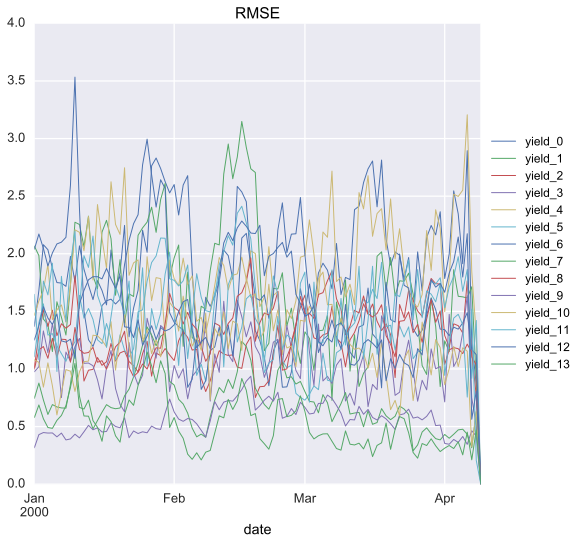

In [25]:
plt.rc('text', usetex=False)
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
forecast_rmse.plot(ax=figures['ax_fig2'],figsize=(8,8),linewidth=1)
plt.legend(loc='center left',fontsize=12,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('RMSE')
plt.axes.labelcolor='black'
plt.show()

## Running code...

In [2]:
start_time = time.time()

# The interveal between each rolling window: the gap by which the estimationd window shifts
# (e.g. with tgap = 1, rolling window is updated daily)
tgap = 30

# Rolling window: 0 if using expanding window, 1 if using rolling window
rolling = 0

#Rolling window size: size of rolling window (in years).. Use inf for full sample estimation
windowsize = np.inf;

np.set_printoptions(precision=32, suppress=True) #increase precision on  numeric values



################################################

# PRIMITIVES:
figures = []
# use allow_missing_data= 1 to extract ILB and Nominal dates where both are non-missing
allow_missing_data = 0

# set frequency of the data: daily, monthly, quarterly, yearly
estim_freq = 'weekly'

fix_Phi = 1     # "1" if you want to fix the volatility of observed yields using covar of historical data
                # "0" if you want to jointly estimate it with other model parameters
setdiag_Kp = 1  # "1" if you want to Kp to be diagonal so the state variables are assumed independent
                # "0" if you want to Kp to be unrestricted

# options for initializing the Kalman filter error variance:
#'steady_state' or 'unconditional' or 'identity' matrix
initV = 'unconditional'

# number of hidden state variables 4, or 6
num_states = 4

# Specify the maturities of data we want to use
US_ilbmaturities = np.array([2, 3,  5, 6, 8, 9, 10])
US_nominalmaturities = np.array([2, 3,  5, 6, 8, 9, 10])
US_maturities = np.hstack((US_nominalmaturities, US_ilbmaturities))

############################################################

# Set start and end dates for estimation
sdate, edate = '2010-01-01', '2015-11-23'#time.strftime("%Y-%m-%d") #'2010-01-01'
print("start date: %s" % sdate)
print("end date: %s" % edate)

# extract data for desired maturities and dates
tips_data, nominal_data = ImportData.importUS_Data(US_ilbmaturities, US_nominalmaturities,plots=0,save=1)
data = ImportData.extract_subset(tips_data, nominal_data, sdate, edate, allow_missing_data, estim_freq)


start date: 2010-01-01
end date: 2015-11-23


In [3]:
from IPython.core.debugger import Tracer; debug_here = Tracer() #this is the approach that works for ipython debugging

estimation1 =Rolling()

In [ ]:

estimation1.run_setup(data, US_ilbmaturities, US_nominalmaturities, \
                estim_freq=estim_freq, num_states=num_states,\
                fix_Phi=fix_Phi, setdiag_Kp=setdiag_Kp, initV=initV)

In [ ]:
nb_stdout = sys.stdout
sys.stdout = open('/dev/stdout', 'wb') #we will temporarily output in terminal

estimation1.fit('em_mle')

sys.stdout = nb_stdout #reset output setting

In [13]:
1+1

2

In [ ]:
def _redirect_stdout(to_fd):
    sys.stdout.close()
    os.dup2(to_fd, original_stdout_fd)

    _buf = os.fdopen(original_stdout_fd, 'wb')
    #_buf = io.open(original_stdout_fd, 'wb')   # for BufferWritter object, not file object

    sys.stdout = _buf

In [17]:

estimation1.collect_results()

NameError: global name 'num_states' is not defined

In [70]:

expected_inflation(estimation1) #do not use smoother here to avoid look-ahead bias


IndexError: too many indices for array

In [ ]:
estimation1.save_output()


In [ ]:
estimation1.plot_results()
end_time = time.time()

In [47]:
estimation1.dictionary_of_allresults['Kp_new']

matrix([[ 0.01419383218781604567848564357746,
          0.                                ,
          0.                                ,  0.                                ],
        [ 0.                                ,
          0.10683085652655760489082581443654,
          0.                                ,  0.                                ],
        [ 0.                                ,
          0.                                ,
          0.01922682823115893363530304327469,  0.                                ],
        [ 0.                                ,
          0.                                ,
          0.                                ,
          0.10998645330632991767849659936473]])

In [8]:
from IPython.core.debugger import Tracer; debug_here = Tracer() #this is the approach that works for ipython debugging

import estimation 
reload(estimation)
from estimation import *


# import estim_constraints 
# reload(estim_constraints)
# from estim_constraints import *

In [68]:
collect_results(estimation1)

processing time for forecast: 15.298445


In [87]:

expected_inflation(estimation1) #do not use smoother here to avoid look-ahead bias

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

TypeError: unhashable type

In [85]:

np.array(np.hstack((estimation1.Xtt_new.values,np.zeros((estimation1.Xtt_new.shape[0],1)))))[0,:]

array([ 0.08775874127573500549370777434888,
       -0.06255049628037973041827513043245,
       -0.14434636006844320244013601950428,
        0.04539522730389707050324687998   ,  0.                                ])

In [86]:
def expected_inflation(self):
    '''Compute expected inflation'''
    Kp_new, rho_n, rho_r, Sigma_new, thetap_new, Xtt_new, rho_n, rho_r = self.Kp_new, self.rho_n, self.rho_r, \
                                                                         self.Sigma_new, self.thetap_new, self.Xtt_new, self.rho_n, self.rho_r

    # Computing Expected Inflation:
    horizons = np.array(np.arange(100).T)  # horizon in years
    mttau = np.empty((self.Y.shape[0], self.num_states+1, horizons.size))
    vttau = np.empty((self.Y.shape[0], (self.num_states+1)**2, horizons.size))

    # First we solve ODE for Covariance matrix of augmented states
    v_ode_out = integrate.ode(v0teqns).set_integrator('dopri5', verbosity=1)
    v_ode_out.set_initial_value(np.zeros(((self.num_states+1)**2,1))[:, 0], horizons[0]).set_f_params(Kp_new, rho_n, rho_r, Sigma_new, thetap_new)
    t_out, v_out = np.array([0]), np.zeros(((self.num_states+1)**2,1)).T
    while v_ode_out.successful() and v_ode_out.t < horizons[-1]:
        v_ode_out.integrate(v_ode_out.t+1)
        t_out = np.vstack((t_out, v_ode_out.t))
        v_out = np.vstack((v_out, v_ode_out.y))

    # Then we solve ODE for Mean of augmented states
    for tt in np.arange(0, self.Y.shape[0]):
        m_ode_out = integrate.ode(m0teqns).set_integrator('dopri5', verbosity=1)
        m_ode_out.set_initial_value(np.array(np.hstack((Xtt_new.values,np.zeros((Xtt_new.shape[0],1)))))[tt,:],\
                                    horizons[0]).set_f_params(Kp_new, rho_n, rho_r, Sigma_new, thetap_new)
        t_out2, m_out = np.array([0]), np.array(np.hstack((Xtt_new.values,np.zeros((Xtt_new.shape[0],1)))))[tt,:]
        while m_ode_out.successful() and m_ode_out.t < horizons[-1]:
            m_ode_out.integrate(m_ode_out.t+1)
            t_out2 = np.vstack((t_out2, m_ode_out.t))
            m_out = np.vstack((m_out, m_ode_out.y))
        mttau[tt,:,:] = m_out.T
        vttau[tt,:,:] = v_out.T

    # Lastly, we are only interested in the column corresponding to variable that is not among the original state variables; so we extract it out
    mttau_nn =  np.mat(mttau[:,-1,:])
    vttau_nn =  np.mat(vttau[:,-1,:])

    # Now we can compute the expected inflation
    exp_inf = -mttau_nn+0.5*vttau_nn
    exp_inf = np.array(np.tile(-1.0/horizons.T,(Xtt_new.shape[0],1)))*np.array(exp_inf)
    exp_inf[:, 0] = np.array(  ((rho_n-rho_r).T) * (np.mat(thetap_new)) )[0,0]
    exp_inf = pd.DataFrame(np.mat(exp_inf),index=self.Y.index)

    # Now we can compute the break-evens
    bk_mats = np.unique(np.vstack((self.US_nominalmaturities, self.US_ilbmaturities)))
    bk_evens = pd.DataFrame(
                    (np.array([self.Y[:,np.in1d(self.US_nominalmaturities, m)].values # Nominal bond with maturity = m
                        -(self.Y[:, self.US_nominalmaturities.size:].values)[:,np.in1d(self.US_ilbmaturities, m)]  # ILB with maturity = m
                        for m in bk_mats])[:,:,0]).T
                    ,index=self.Y.index, columns=bk_mats)

    # %now we can compute the IRPs
    irps = bk_evens - exp_inf.iloc[:,bk_mats-1]

    # lastly we compute the deflation probabilities
    prob_def = -np.array(mttau_nn)/(np.array(vttau_nn)**0.5)
    prob_def = norm.cdf(prob_def)
    prob_def[:, 0] = 0
    prob_def = pd.DataFrame(np.mat(prob_def),index=self.Y.index)

    self.bk_mats, self.exp_inf, self.irps, self.mttau, self.mttau_nn, self.prob_def, self.vttau, self.vttau_nn = \
        bk_mats, exp_inf, irps, mttau, mttau_nn, prob_def, vttau, vttau_nn

    return bk_mats, exp_inf, irps, mttau, mttau_nn, prob_def, vttau, vttau_nn


In [67]:


def collect_results(self):
    '''Save results are attributes'''
    prmtr, optim_output = self.prmtr, self.optim_output

    # Extracting filtered states:
    if self.num_states == 4:
        self.a_new, self.Kp_new, self.lmda_new, self.Phi_new, self.sigma11_new, self.sigma22_new, self.sigma33_new, \
            self.sigma44_new, self.Sigma_new, self.thetap_new = extract_vars( prmtr, self.num_states, self.prmtr_size_dict)

    elif self.num_states == 6:
        self.a_new, self.Kp_new, self.lmda_new, self.lmda2_new, self.Phi_new, self.sigma11_new, self.sigma22_new, \
            self.sigma22_2_new, self.sigma33_new, self.sigma33_2_new, self.sigma44_new, self.Sigma_new, \
            self.thetap_new = extract_vars(prmtr, self.num_states, self.prmtr_size_dict)

    self.A0_new, self.A1_new, self.U0_new, self.U1_new, self.Q_new, self.Phi_new = extract_mats(prmtr, self.num_states,
                                                                  self.US_nominalmaturities, self.US_ilbmaturities,
                                                                  self.dt, self.prmtr_size_dict, self.Phi_prmtr)

    kalman2 = Kalman(self.Y, self.A0_new, self.A1_new, self.U0_new, self.U1_new, self.Q_new, self.Phi_new, self.initV)

    self.Ytt_new, self.Yttl_new, self.Xtt_new, self.Xttl_new, self.Vtt_new, self.Vttl_new, \
        self.Gain_t_new, self.eta_t_new = kalman2.filter()

    self.XtT_new, self.VtT_new, self.Jt_new = kalman2.smoother(self.Xtt_new, self.Xttl_new, self.Vtt_new, self.Vttl_new, self.Gain_t_new, self.eta_t_new)

    # Computing Forecasts, RMSE, etc. :
    self.forecast_horizon = 90 * (self.estim_freq == 'daily') + 12 * (self.estim_freq == 'weekly') + 3 * (self.estim_freq == 'monthly')

    self.yields_forecast, self.yields_forecast_std, self.yields_forecast_cov = kalman2.forecast(self.Xtt_new, self.forecast_horizon)

    self.forecast_e, self.forecast_se, self.forecast_mse, self.forecast_rmse, self.forecast_mse_all, \
        self.forecast_rmse_all = kalman2.rmse(self.yields_forecast)

    # Referencing individual dataframe columns in USnominals and USilbs objecs
    for m in range(self.US_nominalmaturities.size):
        self.USnominals[m].yields_forecast = self.yields_forecast.iloc[:, m]
        self.USnominals[m].yields_forecast_std = self.yields_forecast_std.iloc[:, m]
        self.USnominals[m].yields_forecast_cov = self.yields_forecast_cov.iloc[:, m]

        self.USnominals[m].forecast_e, self.USnominals[m].forecast_se, self.USnominals[m].forecast_mse, \
        self.USnominals[m].forecast_rmse , self.USnominals[m].forecast_mse_all, \
        self.USnominals[m].forecast_rmse_all =  self.forecast_e.iloc[:, m], self.forecast_se.iloc[:, m], \
                                                self.forecast_mse.iloc[:, m], self.forecast_rmse.iloc[:, m], \
                                                self.forecast_mse_all.iloc[m], self.forecast_rmse_all.iloc[m]

    for m in range(self.US_ilbmaturities.size):
        self.USilbs[m].yields_forecast = self.yields_forecast.iloc[:, US_nominalmaturities.size + m]
        self.USilbs[m].yields_forecast_std = self.yields_forecast_std.iloc[:, US_nominalmaturities.size + m]
        self.USilbs[m].yields_forecast_cov = self.yields_forecast_cov.iloc[:, US_nominalmaturities.size + m]

        self.USilbs[m].forecast_e, self.USilbs[m].forecast_se, self.USilbs[m].forecast_mse, self.USilbs[m].forecast_rmse \
            ,self.USilbs[m].forecast_mse_all, self.USilbs[m].forecast_rmse_all = self.forecast_e.iloc[:, US_nominalmaturities.size + m], \
                                                                                  self.forecast_se.iloc[:, US_nominalmaturities.size + m], \
                                                                                  self.forecast_mse.iloc[:, US_nominalmaturities.size + m], \
                                                                                  self.forecast_rmse.iloc[:,US_nominalmaturities.size + m], \
                                                                                  self.forecast_mse_all.iloc[US_nominalmaturities.size + m], \
                                                                                  self.forecast_rmse_all.iloc[US_nominalmaturities.size + m]

    ######################################################################
    if self.num_states == 4:
        self.rho_n = np.mat(np.array([1, 1, 0, 0])).T
        self.rho_r = np.mat(np.array([0, self.a_new, 0, 1])).T
    elif num_states == 6:
        self.rho_n = np.mat(np.array([1, 1, 1, 0, 0, 0])).T
        self.rho_r = np.mat(np.array([0, self.a_new, self.a_new, 0, 0, 1])).T

    if self.num_states == 6:
        self.lmda2_new, self.sigma22_2_new, self.sigma33_2_new =  lmda2_new, sigma22_2_new, sigma33_2_new

## Conclusion

### Take away

### Lingering questions

* Why not use a simpler approach (like PCA) to extract the latent state variables?
    * **Answer**: because no arbritrage condition would be violated by such a model and if we would want to use such a model to identify arbitrage, we would be unable to do so because it would not be clear whether we ideed identify arbitrage opportunities of if the model's flaws drive the results. Furthermore, we would not be able to forecast future yields.
    
    

* Why not use VAR?
    * **Answer**: again, no arbritrage condition would be violated


## References

Detailed documentation/appendix can be found at https://github.com/GinoAndTonic/ssylvain_public/blob/master/research/haats/haats_documentation.lyx
https://github.com/GinoAndTonic/ssylvain_public/blob/master/research/haats/haats_documentation.pdf

My Python code and be forked from 
https://github.com/GinoAndTonic/ssylvain_public/blob/master/research/haats